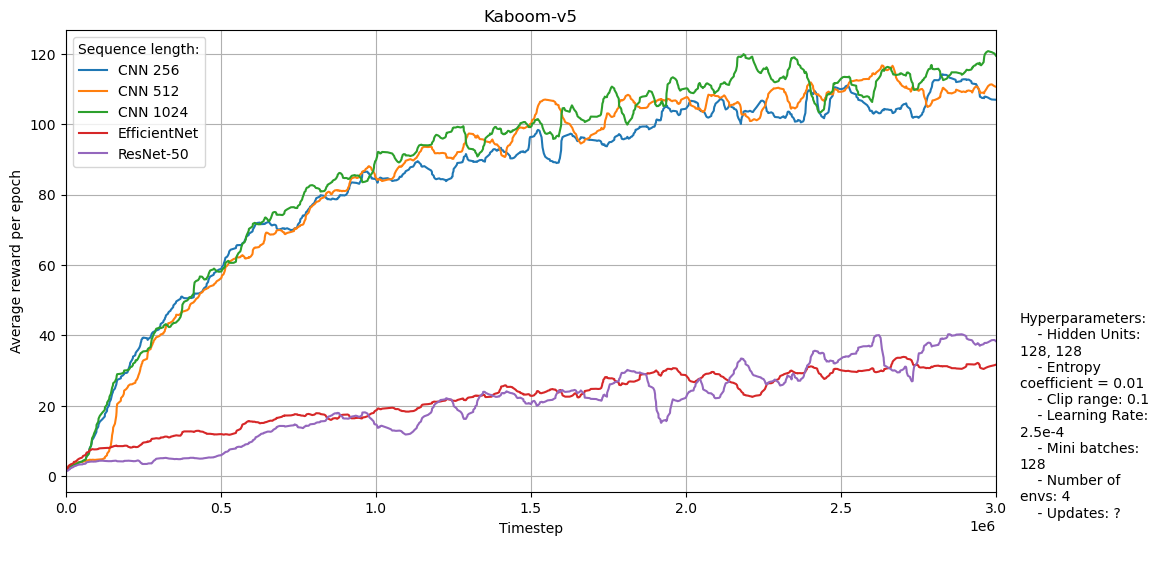

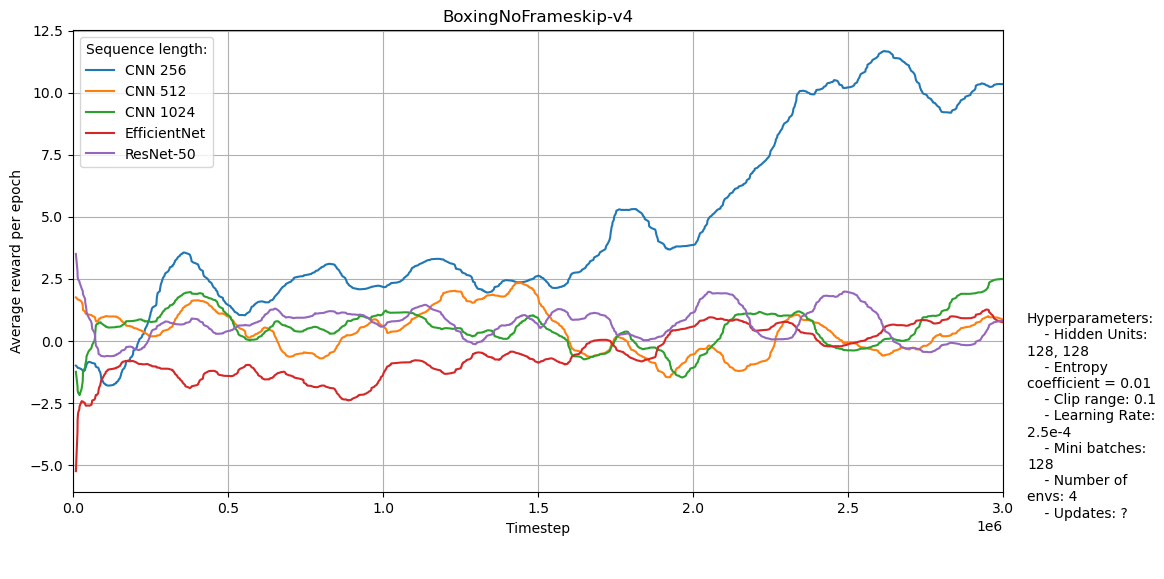

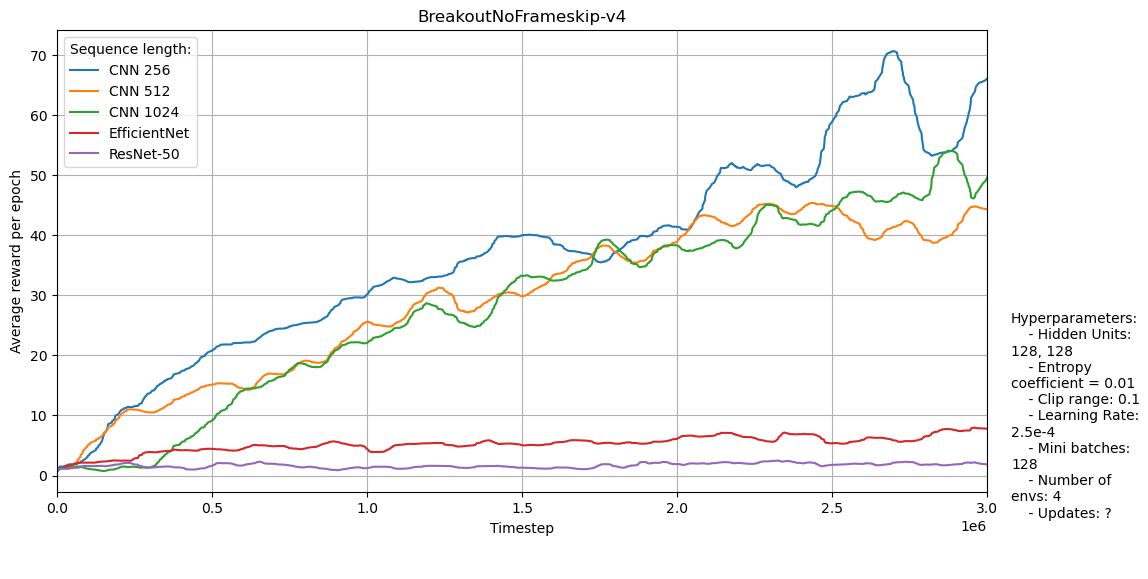

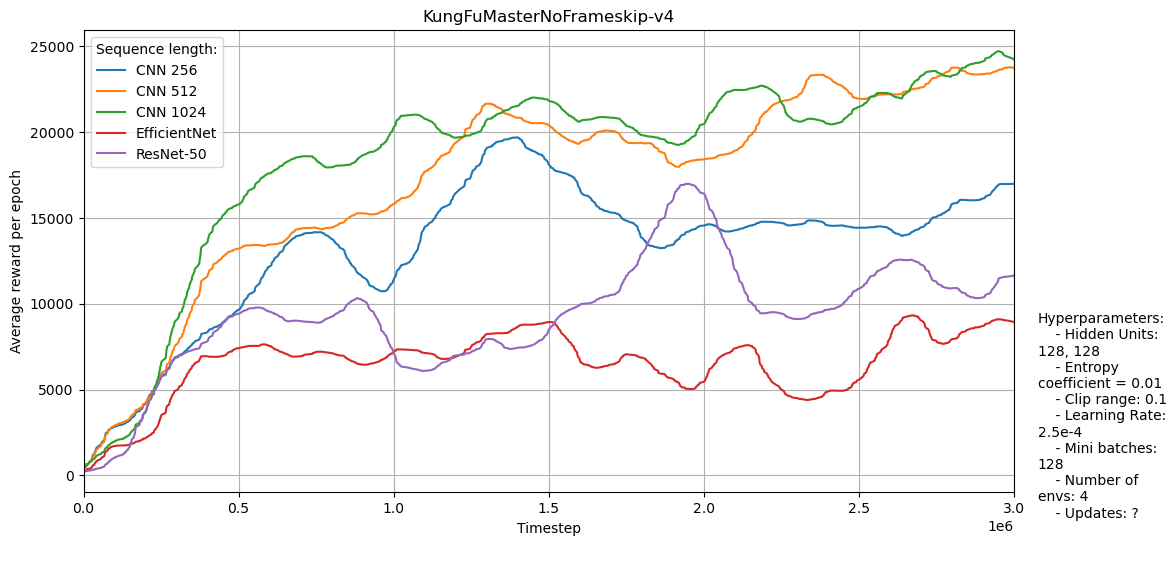

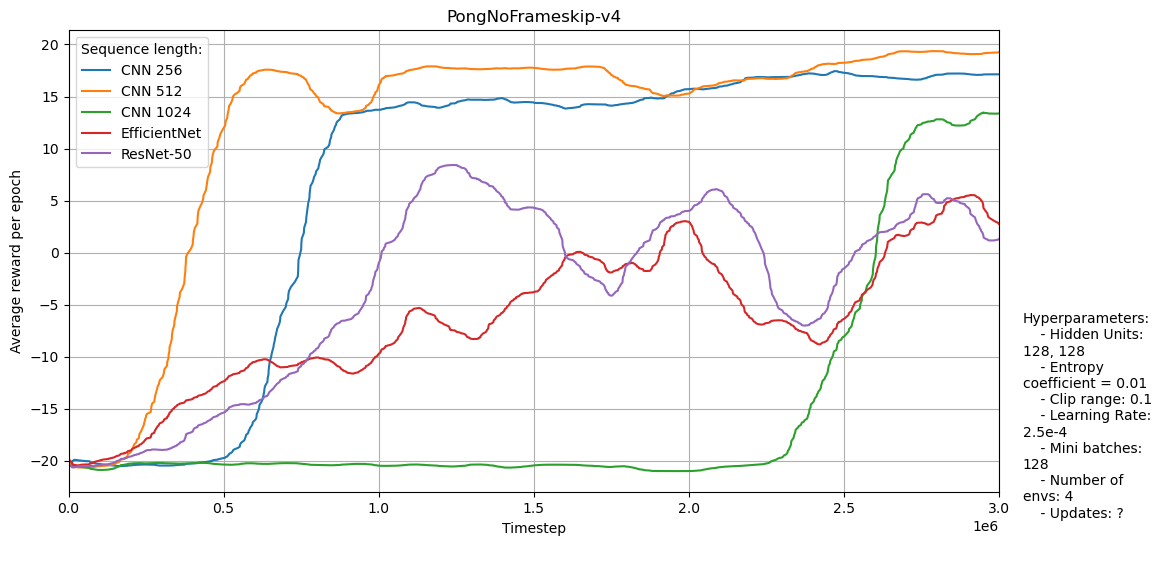

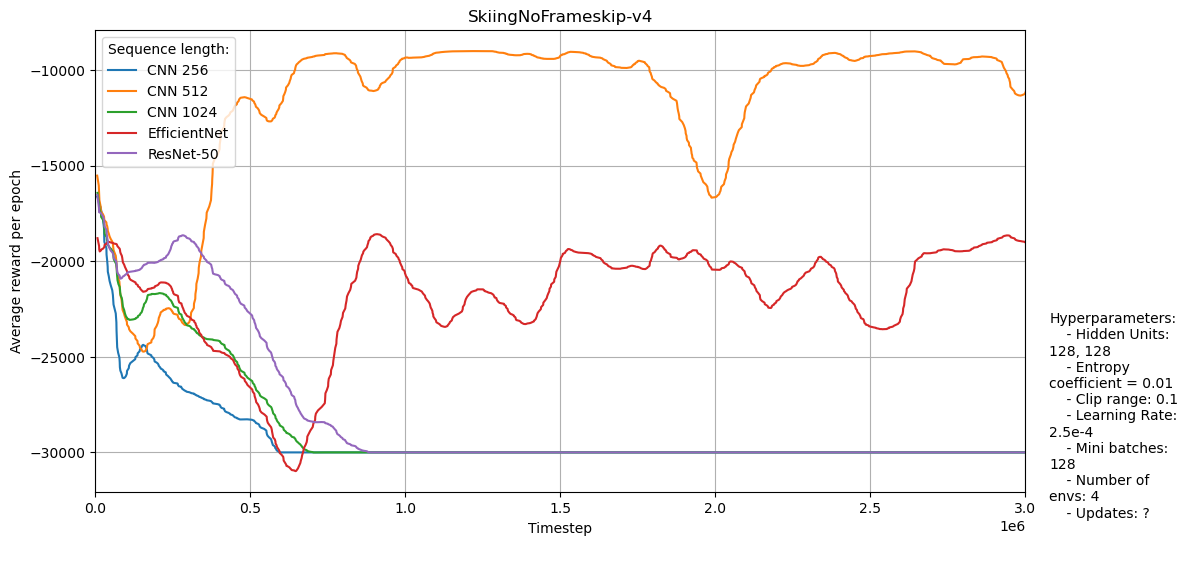

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

envs = ["ALE_Kaboom-v5", "Boxing_BoxingNoFrameskip-v4", "Breakout_BreakoutNoFrameskip-v4", 
        "KungFuMaster_KungFuMasterNoFrameskip-v4", "Pong_PongNoFrameskip-v4", "Skiing_SkiingNoFrameskip-v4"]

for env in envs:
    short_env_name = env[env.find('_')+1:]
    df1 = pd.read_csv(f"plots_csvs/{env}_CNN_256_PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    df2 = pd.read_csv(f"plots_csvs/{env}_CNN_512_PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    df3 = pd.read_csv(f"plots_csvs/{env}_CNN_1024_PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    df4 = pd.read_csv(f"plots_csvs/{env}_efficientnet_1280__PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    df5 = pd.read_csv(f"plots_csvs/{env}_resnet50_2048__PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    
    # Add a column to differentiate between the files
    df1['File'] = 'CNN 256'
    df2['File'] = 'CNN 512'
    df3['File'] = 'CNN 1024'
    df4['File'] = 'EfficientNet'
    df5['File'] = 'ResNet-50'
    
    # Concatenate the DataFrames
    df = pd.concat([df1, df2, df3, df4, df5])
    
    # Apply a rolling window to smooth the data over 10 data points
    window_size = 20
    df['Rolling Min'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).min())
    df['Rolling Max'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).max())
    df['Smoothed Value'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    
    # Plotting using seaborn
    plt.figure(figsize=(12, 6))
    ax = plt.gca()
    sns.lineplot(data=df, x='Step', y='Smoothed Value', hue='File', style='File', dashes=False)
    
    plt.title(short_env_name)
    plt.xlabel('Timestep')
    plt.ylabel('Average reward per epoch')
    plt.grid(True)
    plt.legend(title='Sequence length:')
    ax.set_xlim(0, 3e6)
    
    hyperparameters_text = """
    Hyperparameters:
    - Hidden Units: 128, 128
    - Entropy coefficient = 0.01
    - Clip range: 0.1
    - Learning Rate: 2.5e-4
    - Mini batches: 128
    - Number of envs: 4
    - Updates: ?
    """
    plt.figtext(0.92, 0.25, hyperparameters_text, wrap=True, verticalalignment='center', fontsize=10)
    plt.savefig(f"{short_env_name}.png")
    plt.show()
